In [1]:
############################################################
## Title  : 'Descriptive analysis of demographic data'    ##
## Author : 'Sathish Kabatkar Ravindranth'                ##
## Date   : '10th Nov, 2022'                              ##
## Output :  pdf document                                 ##
## Group  :  5                                            ##
############################################################

In [2]:
library('GGally')
library('dplyr')
library('ggplot2')
library('gridExtra')

Warning message:
“Paket ‘GGally’ wurde unter R Version 4.1.1 erstellt”
Lade nötiges Paket: ggplot2

Warning message:
“Paket ‘ggplot2’ wurde unter R Version 4.1.1 erstellt”
Registered S3 method overwritten by 'GGally':
  method from   
  +.gg   ggplot2


Attache Paket: ‘dplyr’


Die folgenden Objekte sind maskiert von ‘package:stats’:

    filter, lag


Die folgenden Objekte sind maskiert von ‘package:base’:

    intersect, setdiff, setequal, union


Warning message:
“Paket ‘gridExtra’ wurde unter R Version 4.1.1 erstellt”

Attache Paket: ‘gridExtra’


Das folgende Objekt ist maskiert ‘package:dplyr’:

    combine




In [3]:
#Loading the data
census_data <- read.csv('census2001_2021.csv')

In [4]:
#View the Data
head(census_data)

,Country.Name,Subregion,Region,Year,Life.Expectancy..Both.Sexes,Life.Expectancy..Males,Life.Expectancy..Females,Infant.Mortality.Rate..Both.Sexes
,<chr>,<chr>,<chr>,<int>,<dbl>,<dbl>,<dbl>,<dbl>
1,Afghanistan,South-Central Asia,Asia,2001,45.81,44.85,46.83,144.77
2,Afghanistan,South-Central Asia,Asia,2021,53.25,51.73,54.85,106.75
3,Albania,Southern Europe,Europe,2001,75.14,72.39,78.20,23.88
4,Albania,Southern Europe,Europe,2021,79.23,76.55,82.12,11.10
5,Algeria,Northern Africa,Africa,2001,72.19,71.36,73.07,39.97
6,Algeria,Northern Africa,Africa,2021,77.79,76.32,79.33,20.23


In [5]:
#Changing Column Names for better readability
colnames(census_data) <- c("Country","Subregion","Region","Year","Life_exp_both","Life_exp_male","Life_exp_female","Mortality_rate")

In [6]:
#Ordering the Data according Region and Subregion
census_data <- census_data[order(census_data$Region,census_data$Subregion),]

In [7]:
#Factoring with the Sub regions
census_data$Subregion <- factor(census_data$Subregion, levels = unique(census_data$Subregion[order(census_data$Region)]))

In [8]:
head(census_data)

,Country,Subregion,Region,Year,Life_exp_both,Life_exp_male,Life_exp_female,Mortality_rate
,<chr>,<fct>,<chr>,<int>,<dbl>,<dbl>,<dbl>,<dbl>
65,Burundi,Eastern Africa,Africa,2001,55.06,53.02,57.16,83.17
66,Burundi,Eastern Africa,Africa,2021,67.07,64.98,69.22,38.96
87,Comoros,Eastern Africa,Africa,2001,60.17,58.58,61.81,85.45
88,Comoros,Eastern Africa,Africa,2021,66.90,64.65,69.21,58.21
111,Djibouti,Eastern Africa,Africa,2001,58.21,55.97,60.50,69.88
112,Djibouti,Eastern Africa,Africa,2021,65.00,62.40,67.67,47.78


In [9]:
#Check is there any missing values in Data
colSums(is.na(census_data))

Country       Subregion          Region            Year   Life_exp_both 
              0               0               0               0               6 
  Life_exp_male Life_exp_female  Mortality_rate 
              6               6               6

In [10]:
#Check the missing value records #Mortality rate
census_data[which(is.na(census_data$Mortality_rate)),]

,Country,Subregion,Region,Year,Life_exp_both,Life_exp_male,Life_exp_female,Mortality_rate
,<chr>,<fct>,<chr>,<int>,<dbl>,<dbl>,<dbl>,<dbl>
235,Libya,Northern Africa,Africa,2001,NA,NA,NA,NA
379,South Sudan,Northern Africa,Africa,2001,NA,NA,NA,NA
385,Sudan,Northern Africa,Africa,2001,NA,NA,NA,NA
325,Puerto Rico,Caribbean,Americas,2001,NA,NA,NA,NA
429,United States,Northern America,Americas,2001,NA,NA,NA,NA
393,Syria,Western Asia,Asia,2001,NA,NA,NA,NA


In [11]:
#Split the Data Based on the year
census_data_2021 <- census_data %>% filter(Year == 2021)
census_data_2001 <- census_data %>% filter(Year == 2001)

In [12]:
#Summary of data
census_data_2021   %>% summary()

   Country                       Subregion      Region               Year     
 Length:227         Caribbean         : 25   Length:227         Min.   :2021  
 Class :character   Western Asia      : 19   Class :character   1st Qu.:2021  
 Mode  :character   Eastern Africa    : 17   Mode  :character   Median :2021  
                    Western Africa    : 17                      Mean   :2021  
                    Southern Europe   : 16                      3rd Qu.:2021  
                    South-Central Asia: 14                      Max.   :2021  
                    (Other)           :119                                    
 Life_exp_both   Life_exp_male   Life_exp_female Mortality_rate  
 Min.   :53.25   Min.   :51.73   Min.   :54.85   Min.   :  1.53  
 1st Qu.:69.73   1st Qu.:67.58   1st Qu.:72.29   1st Qu.:  6.27  
 Median :75.56   Median :72.99   Median :78.36   Median : 12.58  
 Mean   :74.28   Mean   :71.78   Mean   :76.89   Mean   : 20.25  
 3rd Qu.:79.42   3rd Qu.:76.94   3rd Q

In [13]:
#Get the difference between the Life expectancy of female and male
census_data_2001$Life_exp_diff_btw_sexes <- census_data_2001$Life_exp_female - census_data_2001$Life_exp_male
census_data_2021$Life_exp_diff_btw_sexes <- census_data_2021$Life_exp_female - census_data_2021$Life_exp_male

### Frequency Distributions of Different Variables

In [14]:
#######TASK1######

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



TableGrob (2 x 2) "arrange": 4 grobs
  z     cells    name           grob
1 1 (1-1,1-1) arrange gtable[layout]
2 2 (1-1,2-2) arrange gtable[layout]
3 3 (2-2,1-1) arrange gtable[layout]
4 4 (2-2,2-2) arrange gtable[layout]

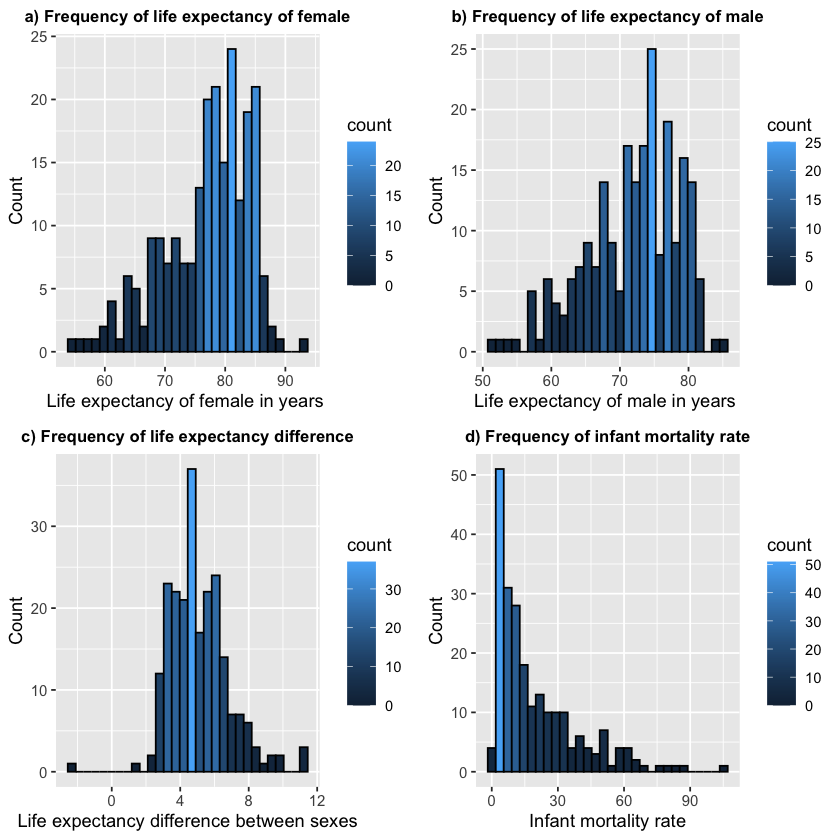

In [15]:
plot1  <- ggplot(census_data_2021, aes(x = Life_exp_female)) +
          geom_histogram(aes(fill = ..count..), col = "black")+
          scale_x_continuous(name = "Life expectancy of female in years ") +
          scale_y_continuous(name = "Count") +
          ggtitle("a) Frequency of life expectancy of female") +
          theme(plot.title = element_text(hjust = 0.5, size = 10, face="bold"), 
            axis.text=element_text(size=9),
             axis.title=element_text(size=11))

plot2  <- ggplot(census_data_2021, aes(x = Life_exp_male)) +
           geom_histogram(aes(fill = ..count..), col = "black")+
           scale_x_continuous(name = "Life expectancy of male in years ") +
           scale_y_continuous(name = "Count") +
           ggtitle("b) Frequency of life expectancy of male") +
           theme(plot.title = element_text(hjust = 0.5, size = 10, face="bold"), 
             axis.text=element_text(size=9),
             axis.title=element_text(size=11))

plot3  <- ggplot(census_data_2021, aes(x = Life_exp_diff_btw_sexes)) +
           geom_histogram(aes(fill = ..count..), col = "black")+
           scale_x_continuous(name = "Life expectancy difference between sexes") +
           scale_y_continuous(name = "Count") +
           ggtitle("c) Frequency of life expectancy difference") +
           theme(plot.title = element_text(hjust = 0.5, size = 10, face="bold"), 
             axis.text=element_text(size=9),
             axis.title=element_text(size=11))

plot4  <- ggplot(census_data_2021, aes(x = Mortality_rate)) +
           geom_histogram(aes(fill = ..count..), col = "black")+
           scale_x_continuous(name = "Infant mortality rate") +
           scale_y_continuous(name = "Count") +
           ggtitle("d) Frequency of infant mortality rate") +
           theme(plot.title = element_text(hjust = 0.5, size = 10, face="bold"), 
             axis.text=element_text(size=9),
             axis.title=element_text(size=11))

final_plot1 <- grid.arrange(plot1, plot2, plot3, plot4, ncol=2, nrow = 2)
#ggsave("histograms.pdf",plot = final_plot1)
final_plot1

In [16]:
#######TASK2######

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



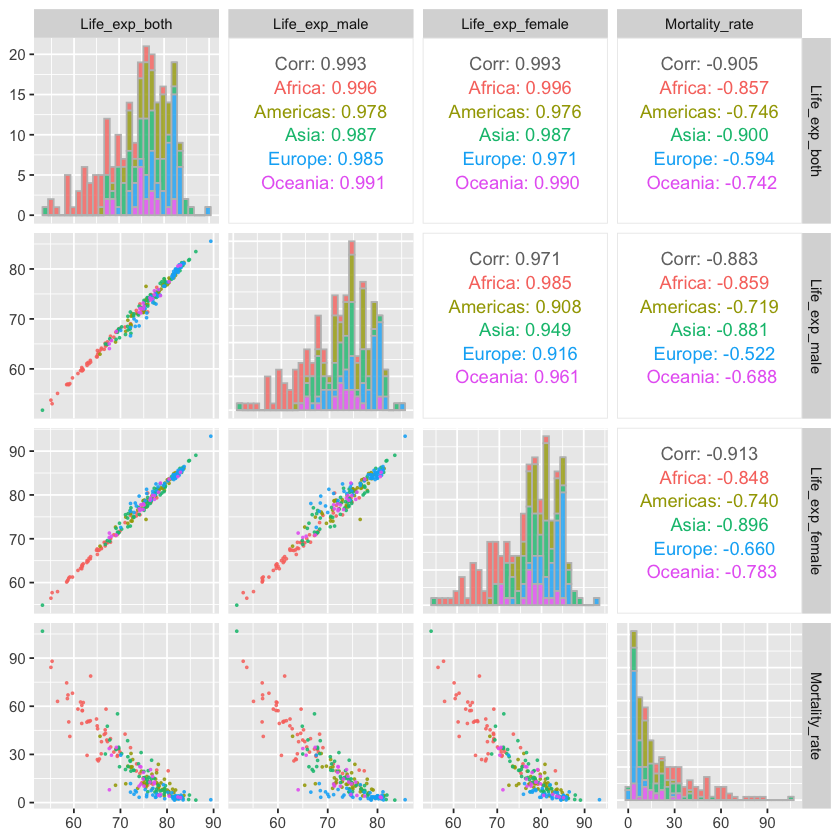

In [17]:
#Pairplot
scat_plot  <- ggpairs(census_data_2021, columns = 5:8, 
                     upper = list(continuous = GGally::wrap(ggally_cor, stars = F)),
                     diag = list(continuous = wrap("barDiag", alpha = 0.8, color="grey")), 
                     lower = list(continuous = wrap("points", alpha = 0.8,size=0.4), 
                     combo = wrap("dot", alpha = 0.8,size=0.2) ),
                     mapping=ggplot2::aes(colour = Region)) + 
                     theme(axis.text=element_text(size=9),
                     axis.title=element_text(size=11)) 
#ggsave("corr_plot.pdf",plot = scat_plot)
scat_plot

In [18]:
#####TASK 3#######

In [19]:
#Summary for box plot for life expectancy of both sexes in regions and subregions
census_data_2021 %>%                               # Summary by group using dplyr
  group_by(Region) %>% 
  dplyr::summarize(min = min(Life_exp_both),
            q1 = quantile(Life_exp_both, 0.25),
            median = median(Life_exp_both),
            q3 = quantile(Life_exp_both, 0.75),
            max = max(Life_exp_both))

census_data_2021 %>%                               # Summary by group using dplyr
  group_by(Region) %>% 
  dplyr::summarize(min = min(Mortality_rate),
            q1 = quantile(Mortality_rate, 0.25),
            median = median(Mortality_rate),
            q3 = quantile(Mortality_rate, 0.75),
            max = max(Mortality_rate))

census_data_2021 %>%                               # Summary by group using dplyr
  group_by(Subregion) %>% 
  dplyr::summarize(min = min(Life_exp_both),
            q1 = quantile(Life_exp_both, 0.25),
            median = median(Life_exp_both),
            q3 = quantile(Life_exp_both, 0.75),
            max = max(Life_exp_both))

census_data_2021 %>%                               # Summary by group using dplyr
  group_by(Subregion) %>% 
  dplyr::summarize(min = min(Mortality_rate),
            q1 = quantile(Mortality_rate, 0.25),
            median = median(Mortality_rate),
            q3 = quantile(Mortality_rate, 0.75),
            max = max(Mortality_rate))

Region,min,q1,median,q3,max
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Africa,55.07,61.8100,65.480,69.3450,80.25
Americas,65.61,74.9525,77.655,79.4325,83.62
Asia,53.25,71.6350,75.500,78.2375,86.19
Europe,70.06,76.9700,81.300,82.3500,89.40
Oceania,67.59,74.1700,75.060,77.2900,82.89


Region,min,q1,median,q3,max
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Africa,10.83,29.4300,42.39,57.295,88.03
Americas,2.21,8.2075,11.49,15.205,41.29
Asia,1.56,7.5000,15.64,26.295,106.75
Europe,1.53,3.2400,3.64,5.320,29.51
Oceania,3.05,7.9600,12.73,20.520,34.40


Subregion,min,q1,median,q3,max
<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Eastern Africa,55.32,65.4800,67.070,69.3200,75.84
Middle Africa,55.07,61.4300,61.710,63.6000,69.37
Northern Africa,58.60,70.0950,74.180,76.7500,77.79
Southern Africa,58.90,59.1300,65.040,65.2400,65.87
Western Africa,58.45,61.8200,63.530,69.0100,80.25
Caribbean,65.61,75.8700,78.310,80.0500,82.00
Central America,71.14,74.0400,75.005,75.8625,79.41
Northern America,73.71,80.4300,81.200,81.8300,83.62
South America,68.94,72.2575,75.035,78.0850,79.57


Subregion,min,q1,median,q3,max
<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Eastern Africa,10.83,29.4100,34.620,42.3900,88.03
Middle Africa,29.45,49.2800,60.580,67.0200,84.22
Northern Africa,11.48,15.1550,19.680,31.6900,64.77
Southern Africa,25.97,26.8200,30.380,41.2000,50.23
Western Africa,19.77,37.9600,50.710,57.3600,74.55
Caribbean,3.11,7.8400,10.700,13.0500,41.29
Central America,8.59,11.6475,13.885,18.1600,26.81
Northern America,2.21,4.4400,5.220,8.3500,8.90
South America,6.68,10.4875,16.340,22.3800,30.58


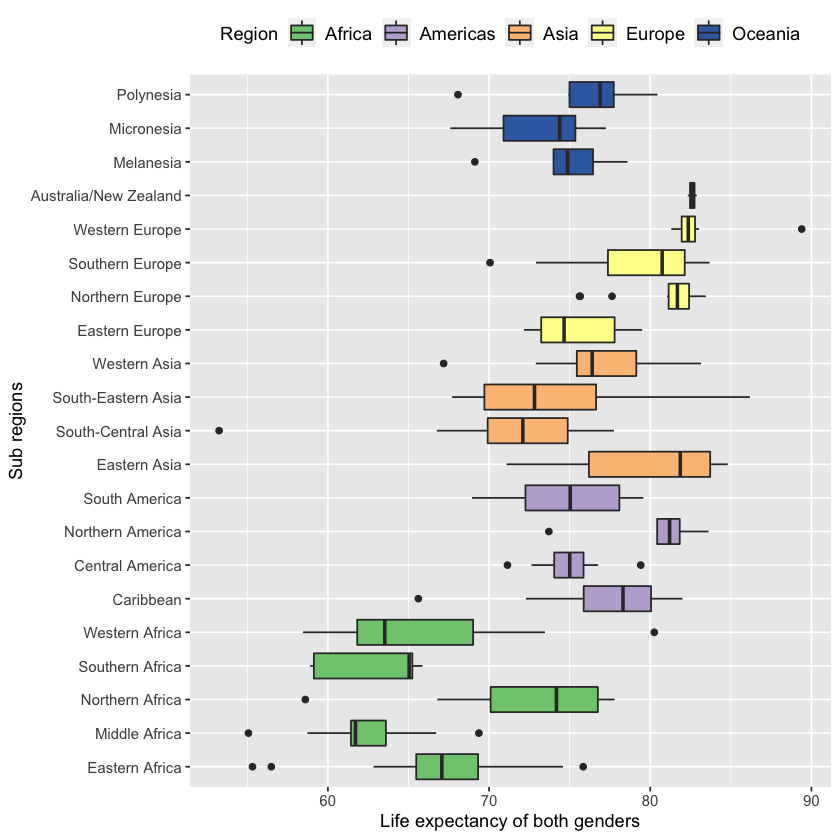

In [20]:
#Comparing the Life Expectancies of Male in Sub Regions
box_plot1 <- census_data_2021 %>%
  ggplot(aes(x=Subregion, y=Life_exp_both, fill=Region)) +
  geom_boxplot() +
  coord_flip()+ scale_fill_brewer(palette="Accent") +
  theme(legend.position="top", 
        axis.text = element_text(vjust = 0.5, size = 9),
        legend.text = element_text(size = 11), 
        axis.title=element_text(size=11)
       )+
  xlab("Sub regions") + ylab("Life expectancy of both genders") 
box_plot1
#ggsave('Boxplot1.pdf', plot = box_plot1)

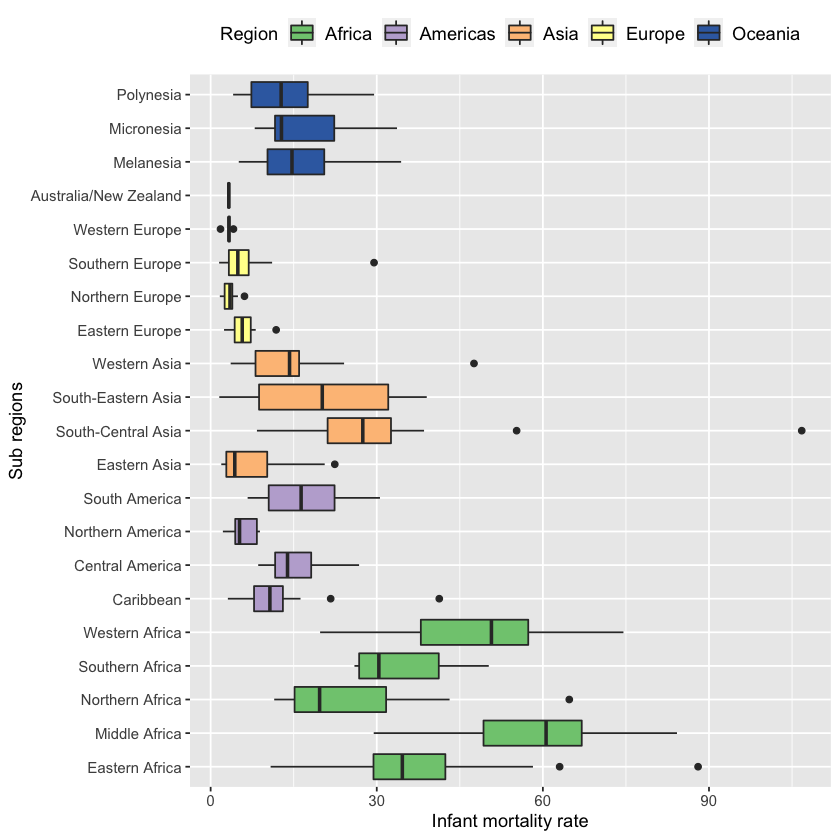

In [21]:
#Comparing the infant mortality rate in sub regions
box_plot2 <-  census_data_2021 %>%
  ggplot(aes(x=Subregion, y=Mortality_rate, fill=Region)) +
  geom_boxplot() + scale_fill_brewer(palette="Accent") +
  coord_flip()+
  theme(legend.position="top", 
        axis.text = element_text(vjust = 0.5, size = 9),
        legend.text = element_text(size = 11), 
        axis.title=element_text(size=11)
       )+
  xlab("Sub regions") + ylab("Infant mortality rate") 
box_plot2
#ggsave('Boxplot2.pdf', plot = box_plot2)

In [22]:
#####TASK4####### 

In [23]:
countries  <- census_data[which(is.na(census_data$Mortality_rate)),]$Country

In [24]:
census_data_2001  <- census_data_2001  %>% filter(!Country %in% countries)
census_data_2021  <- census_data_2021  %>% filter(!Country %in% countries)

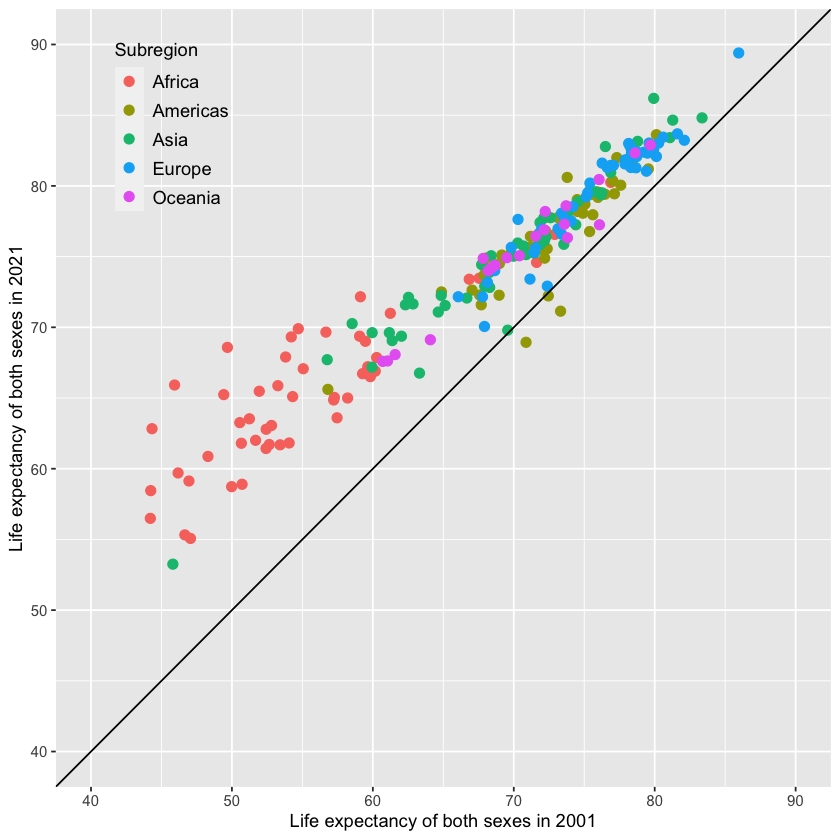

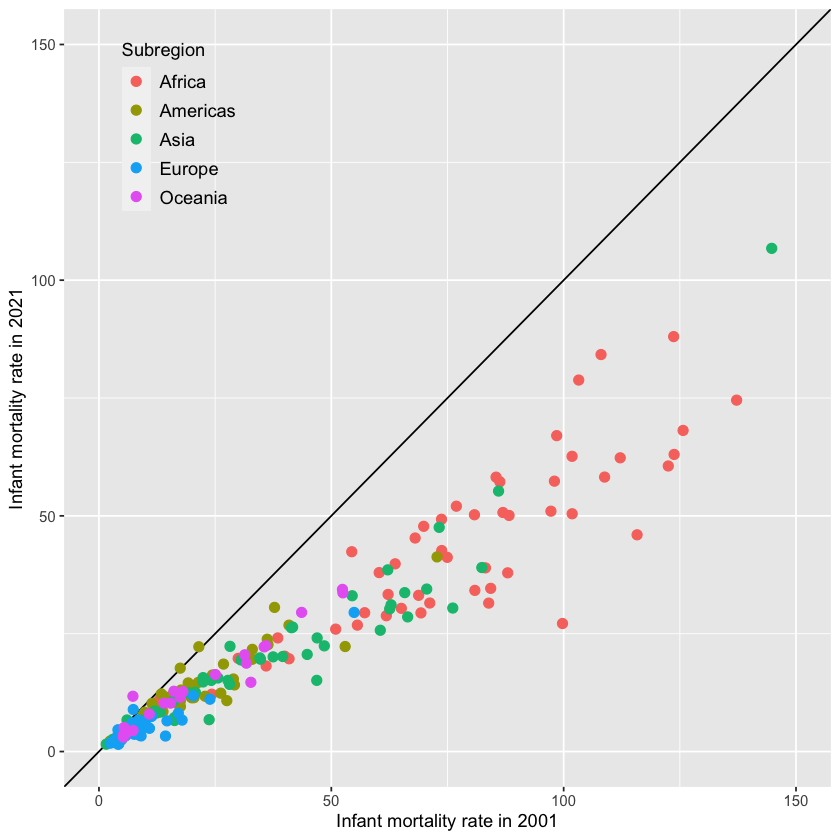

In [25]:
scat_plot1 <- ggplot(data = NULL, aes(x = census_data_2001$Life_exp_both, 
                        y = census_data_2021$Life_exp_both, 
                        color = census_data_2001$Region)) + 
      geom_point(size = 2.5) + guides(colour = guide_legend(title = "Subregion", size = 12)) + 
      geom_abline(intercept =0 , slope = 1)+ xlim(40,90)+ylim(40,90) +
      xlab("Life expectancy of both sexes in 2001") + ylab("Life expectancy of both sexes in 2021") + 
      theme(plot.title = element_text(hjust = 0.5, size = 12, face="bold"),
          legend.position = c(0.15, 0.85),legend.background = element_rect(fill = "transparent"), 
          legend.text = element_text(size = 11), 
          axis.text=element_text(size=9),
          axis.title=element_text(size=11))

scat_plot2  <- ggplot(data = NULL, aes(x = census_data_2001$Mortality_rate, 
                        y = census_data_2021$Mortality_rate, 
                        color = census_data_2001$Region)) + geom_abline(intercept =0 , slope = 1) +
      xlim(0,150)+ylim(0,150) +
      geom_point(size = 2.5) + guides(colour = guide_legend(title = "Subregion", size = 12)) + 
      xlab("Infant mortality rate in 2001") + ylab("Infant mortality rate in 2021") + 
      theme(plot.title = element_text(hjust = 0.5, size = 12, face="bold"),
          legend.position = c(0.15, 0.85),legend.background = element_rect(fill = "transparent"), 
          legend.text = element_text(size = 11), 
          axis.text=element_text(size=9),
          axis.title=element_text(size=11))

#ggsave("final_plot1.pdf",plot = scat_plot1)
#ggsave("final_plot2.pdf",plot = scat_plot2)
scat_plot1
scat_plot2